<a href="https://colab.research.google.com/github/sumedhasjs/DoS-and-DDoS-Attack-Detection/blob/main/DoS_Attack_Entropy_Method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%cd 'gdrive/MyDrive'

/content/gdrive/MyDrive


In [ ]:
!ls 'FYP Dataset'

DDoS1.csv	Idle13.csv  Idle23.csv	   Working12.csv  Working3.csv
DDoS2.csv	Idle14.csv  Idle2.csv	   Working13.csv  Working4.csv
DDoS3.csv	Idle15.csv  Idle3.csv	   Working14.csv  Working5.csv
DDoS4.csv	Idle16.csv  Idle4.csv	   Working15.csv  Working6.csv
DoS1.csv	Idle17.csv  Idle5.csv	   Working16.csv  Working7.csv
DoS2.csv	Idle18.csv  Idle6.csv	   Working17.csv  Working8.csv
EntropyDoS.csv	Idle19.csv  Idle7.csv	   Working18.csv  Working9.csv
file.csv	Idle1.csv   Idle8.csv	   Working19.csv
Idle10.csv	Idle20.csv  Idle9.csv	   Working1.csv
Idle11.csv	Idle21.csv  Working10.csv  Working20.csv
Idle12.csv	Idle22.csv  Working11.csv  Working2.csv


In [ ]:
import pandas as pd

In [ ]:
attack=pd.read_csv('FYP Dataset/DoS1.csv')
attack = attack.sample(frac = 1)
print(len(attack))
attack=attack[:3000]
working=pd.read_csv('FYP Dataset/Working1.csv')
working = working.sample(frac = 1)
print(len(working))
working=working[:3000]
idle=pd.read_csv('FYP Dataset/Idle1.csv')
idle = idle.sample(frac = 1)
print(len(idle))
idle=idle[:3000]

7866
3042
4444


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
idle["Attack"] = -1
working["Attack"] = -1
attack["Attack"] = 1

In [ ]:
ls=[working,idle,attack]
dataset_train=pd.concat(ls)

In [ ]:
len(dataset_train)

9000

In [ ]:
dataset_train.head()

,Protocol,Local Address,Remote Address,Local Port,Remote Port,Local Host,Remote Host,Service Name,Packets,Data Size,Total Size,Data Speed,Capture Time,Last Packet Time,Duration,Attack
1645,UDP,192.168.29.184,239.255.255.250,59822.0,1900.0,NaN,NaN,ssdp,2,632 Bytes,"1,000 Bytes",0.0 KB/Sec,12/10/2022 9:22:39 AM:997,12/10/2022 12:08:42 PM:780,46:02.8,-1
1742,TCP,192.168.29.50,35.197.154.200,63392.0,443.0,Sumedha,200.154.197.35.bc.googleusercontent.com,https,26,"6,410 Bytes","8,027 Bytes",0.8 KB/Sec,12/10/2022 9:27:41 AM:448,12/10/2022 9:27:49 AM:517,00:08.1,-1
2174,TCP,192.168.29.50,3.94.242.245,52763.0,443.0,Sumedha,nmm-use1-prod-alb-pbs-server-1662300823.us-eas...,https,40,"9,147 Bytes","11,314 Bytes",0.8 KB/Sec,12/10/2022 9:42:18 AM:717,12/10/2022 9:42:29 AM:904,00:11.2,-1
2507,TCP,192.168.29.50,3.220.90.138,50264.0,443.0,Sumedha,f-log-win-extension.grammarly.io,https,9,"1,569 Bytes","2,095 Bytes",0.0 KB/Sec,12/10/2022 10:12:25 AM:212,12/10/2022 10:14:18 AM:372,01:53.2,-1
1121,TCP,192.168.29.50,52.200.75.167,50904.0,443.0,Sumedha,NaN,https,198,"198,133 Bytes","206,658 Bytes",64.8 KB/Sec,12/10/2022 8:51:51 AM:581,12/10/2022 8:51:54 AM:575,00:03.0,-1


In [ ]:
dataset_train = dataset_train.drop(["Local Host","Remote Host","Service Name","Capture Time","Last Packet Time"],axis=1)
dataset_train = dataset_train.reset_index(drop = True)
dataset_train.head()

,Protocol,Local Address,Remote Address,Local Port,Remote Port,Packets,Data Size,Total Size,Data Speed,Duration,Attack
0,UDP,192.168.29.184,239.255.255.250,59822.0,1900.0,2,632 Bytes,"1,000 Bytes",0.0 KB/Sec,46:02.8,-1
1,TCP,192.168.29.50,35.197.154.200,63392.0,443.0,26,"6,410 Bytes","8,027 Bytes",0.8 KB/Sec,00:08.1,-1
2,TCP,192.168.29.50,3.94.242.245,52763.0,443.0,40,"9,147 Bytes","11,314 Bytes",0.8 KB/Sec,00:11.2,-1
3,TCP,192.168.29.50,3.220.90.138,50264.0,443.0,9,"1,569 Bytes","2,095 Bytes",0.0 KB/Sec,01:53.2,-1
4,TCP,192.168.29.50,52.200.75.167,50904.0,443.0,198,"198,133 Bytes","206,658 Bytes",64.8 KB/Sec,00:03.0,-1


In [ ]:
dataset_train['Throughput']=0
dataset_train["Duration in seconds"] = 0

In [ ]:
import string
from datetime import datetime
for i in range(len(dataset_train)):
  t = datetime.strptime(dataset_train["Duration"][i].split('.')[0], '%M:%S').time()
  dataset_train["Duration in seconds"][i] = t.hour*3600 + t.minute*60 + t.second
  
  if(type(dataset_train["Packets"][i])==int or type(dataset_train["Packets"][i])==float):
    dataset_train["Packets"][i] = dataset_train["Packets"][i]
  else:
    if(type(dataset_train["Packets"][i])==str):
      dataset_train["Packets"][i] = dataset_train["Packets"][i].translate(str.maketrans('', '', string.punctuation))
      dataset_train["Packets"][i] = int(dataset_train["Packets"][i].split(' ')[0])
      dataset_train["Packets"][i] = int(dataset_train["Packets"][i])

<ipython-input-13-22298153ade2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_train["Duration in seconds"][i] = t.hour*3600 + t.minute*60 + t.second
<ipython-input-13-22298153ade2>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_train["Packets"][i] = dataset_train["Packets"][i].translate(str.maketrans('', '', string.punctuation))
<ipython-input-13-22298153ade2>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data

In [ ]:
dataset_train.head()

,Protocol,Local Address,Remote Address,Local Port,Remote Port,Packets,Data Size,Total Size,Data Speed,Duration,Attack,Throughput,Duration in seconds
0,UDP,192.168.29.184,239.255.255.250,59822.0,1900.0,2,632 Bytes,"1,000 Bytes",0.0 KB/Sec,46:02.8,-1,0,2762
1,TCP,192.168.29.50,35.197.154.200,63392.0,443.0,26,"6,410 Bytes","8,027 Bytes",0.8 KB/Sec,00:08.1,-1,0,8
2,TCP,192.168.29.50,3.94.242.245,52763.0,443.0,40,"9,147 Bytes","11,314 Bytes",0.8 KB/Sec,00:11.2,-1,0,11
3,TCP,192.168.29.50,3.220.90.138,50264.0,443.0,9,"1,569 Bytes","2,095 Bytes",0.0 KB/Sec,01:53.2,-1,0,113
4,TCP,192.168.29.50,52.200.75.167,50904.0,443.0,198,"198,133 Bytes","206,658 Bytes",64.8 KB/Sec,00:03.0,-1,0,3


In [ ]:
for i in range(len(dataset_train)):
  val = dataset_train["Packets"][i]/dataset_train["Duration in seconds"][i]
  if val==np.inf or val==-np.inf:
    val = 10**15
  dataset_train["Throughput"][i] = val

<ipython-input-15-ad44b00ee02e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_train["Throughput"][i] = val
<ipython-input-15-ad44b00ee02e>:2: RuntimeWarning: divide by zero encountered in long_scalars
  val = dataset_train["Packets"][i]/dataset_train["Duration in seconds"][i]


In [ ]:
throughput=dataset_train['Throughput']

In [ ]:
throughput.replace([np.inf, -np.inf], np.nan, inplace=True)
throughput.dropna(how="all", inplace=True)

In [ ]:
data=dataset_train["Remote Port"].tolist()

In [ ]:
import scipy.stats
def entropy_calc(data):
    p_data = data.value_counts()           
    entropy = scipy.stats.entropy(p_data)  
    return entropy

In [ ]:
dataset_train["Entropy Remote Port"] = 0.0
for i in range(0,len(dataset_train)):
  dataset_train["Entropy Remote Port"][i] = entropy_calc(dataset_train["Remote Port"][:i+1])

Streaming output truncated to the last 5000 lines.
<ipython-input-20-f9db2270a36a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_train["Entropy Remote Port"][i] = entropy_calc(dataset_train["Remote Port"][:i+1])
<ipython-input-20-f9db2270a36a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_train["Entropy Remote Port"][i] = entropy_calc(dataset_train["Remote Port"][:i+1])
<ipython-input-20-f9db2270a36a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.h

In [ ]:
dataset_train["Anomaly Remote Port Entropy Based"] = -1
check_port = dataset_train["Entropy Remote Port"][0]
for i in range(0,len(dataset_train)):
    if (dataset_train["Entropy Remote Port"][i]>check_port) :
      dataset_train["Anomaly Remote Port Entropy Based"][i] = 1
      check_port=dataset_train["Entropy Remote Port"][i]
    

<ipython-input-21-91f323bd11a6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_train["Anomaly Remote Port Entropy Based"][i] = 1


In [ ]:
from sklearn.metrics import confusion_matrix,precision_score,accuracy_score,recall_score,f1_score, classification_report
tn, fp, fn, tp = confusion_matrix(dataset_train["Attack"], dataset_train["Anomaly Remote Port Entropy Based"]).ravel()
precision = precision_score(dataset_train["Attack"], dataset_train["Anomaly Remote Port Entropy Based"])
recall=recall_score(dataset_train["Attack"], dataset_train["Anomaly Remote Port Entropy Based"])
accuracy = accuracy_score(dataset_train["Attack"], dataset_train["Anomaly Remote Port Entropy Based"])
f1_score = f1_score(dataset_train["Attack"], dataset_train["Anomaly Remote Port Entropy Based"])
ClassificationReport=classification_report(dataset_train["Attack"], dataset_train["Anomaly Remote Port Entropy Based"])
print("True Positives: ",tp)
print("\nFalse Positives: ",fp)
print("\nTrue Negatives: ",tn)
print("\nFalse Negatives: ",fn)
print("\nAccuracy: ",accuracy)
print("\nPrecision: ",precision)
print("\nRecall: ",recall)
print("\nF1 Score: ",f1_score)
print("\nClassification Report: \n")
print(ClassificationReport)

True Positives:  2969

False Positives:  1044

True Negatives:  4956

False Negatives:  31

Accuracy:  0.8805555555555555

Precision:  0.7398455021181162

Recall:  0.9896666666666667

F1 Score:  0.8467132468273207

Classification Report: 

              precision    recall  f1-score   support

          -1       0.99      0.83      0.90      6000
           1       0.74      0.99      0.85      3000

    accuracy                           0.88      9000
   macro avg       0.87      0.91      0.87      9000
weighted avg       0.91      0.88      0.88      9000



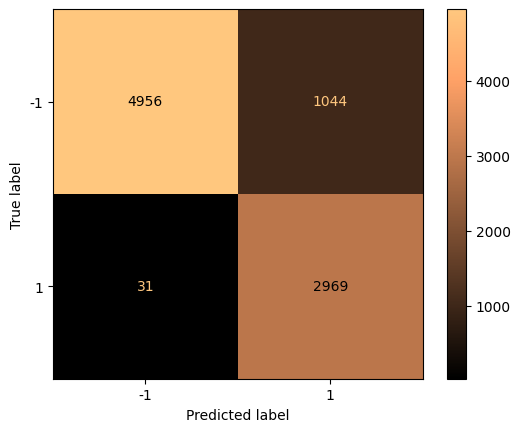

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
cm=confusion_matrix(dataset_train["Attack"], dataset_train["Anomaly Remote Port Entropy Based"])
disp_poly = ConfusionMatrixDisplay.from_predictions(dataset_train["Attack"], dataset_train["Anomaly Remote Port Entropy Based"],cmap='copper')

## Testing

In [ ]:
attack=pd.read_csv('FYP Dataset/DoS1.csv')
attack=attack.append(pd.read_csv('FYP Dataset/DoS2.csv'))
attack = attack.sample(frac = 1)
print(len(attack))
attack=attack[:3000]
print(len(attack))

11429
3000


<ipython-input-24-f8b7549f9ad2>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  attack=attack.append(pd.read_csv('FYP Dataset/DoS2.csv'))


In [ ]:
working=pd.read_csv('FYP Dataset/Working1.csv')
working=working.append(pd.read_csv('FYP Dataset/Working2.csv'))
working=working.append(pd.read_csv('FYP Dataset/Working3.csv'))
working=working.append(pd.read_csv('FYP Dataset/Working4.csv'))
working=working.append(pd.read_csv('FYP Dataset/Working5.csv'))
working=working.append(pd.read_csv('FYP Dataset/Working6.csv'))
working=working.append(pd.read_csv('FYP Dataset/Working7.csv'))
working=working.append(pd.read_csv('FYP Dataset/Working8.csv'))
working=working.append(pd.read_csv('FYP Dataset/Working9.csv'))
working=working.append(pd.read_csv('FYP Dataset/Working10.csv'))
working=working.append(pd.read_csv('FYP Dataset/Working11.csv'))
working=working.append(pd.read_csv('FYP Dataset/Working12.csv'))
working=working.append(pd.read_csv('FYP Dataset/Working13.csv'))
working=working.append(pd.read_csv('FYP Dataset/Working14.csv'))
working=working.append(pd.read_csv('FYP Dataset/Working15.csv'))
working=working.append(pd.read_csv('FYP Dataset/Working16.csv'))
working=working.append(pd.read_csv('FYP Dataset/Working17.csv'))
working=working.append(pd.read_csv('FYP Dataset/Working18.csv'))
working=working.append(pd.read_csv('FYP Dataset/Working19.csv'))
working=working.append(pd.read_csv('FYP Dataset/Working20.csv'))
working = working.sample(frac = 1)
print(len(working))
working=working[:60000]
print(len(working))

<ipython-input-25-29d2c14a72bd>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  working=working.append(pd.read_csv('FYP Dataset/Working2.csv'))
<ipython-input-25-29d2c14a72bd>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  working=working.append(pd.read_csv('FYP Dataset/Working3.csv'))
<ipython-input-25-29d2c14a72bd>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  working=working.append(pd.read_csv('FYP Dataset/Working4.csv'))
<ipython-input-25-29d2c14a72bd>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  working=working.append(pd.read_csv('FYP Dataset/Working5.csv'))
<ipython-input-25-29d2c14a72bd>:6: FutureWarning: The frame.appe

60659
60000


<ipython-input-25-29d2c14a72bd>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  working=working.append(pd.read_csv('FYP Dataset/Working20.csv'))


In [ ]:
idle=pd.read_csv('FYP Dataset/Idle1.csv')
idle=idle.append(pd.read_csv('FYP Dataset/Idle2.csv'))
idle=idle.append(pd.read_csv('FYP Dataset/Idle3.csv'))
idle=idle.append(pd.read_csv('FYP Dataset/Idle4.csv'))
idle=idle.append(pd.read_csv('FYP Dataset/Idle5.csv'))
idle=idle.append(pd.read_csv('FYP Dataset/Idle6.csv'))
idle=idle.append(pd.read_csv('FYP Dataset/Idle7.csv'))
idle=idle.append(pd.read_csv('FYP Dataset/Idle8.csv'))
idle=idle.append(pd.read_csv('FYP Dataset/Idle9.csv'))
idle=idle.append(pd.read_csv('FYP Dataset/Idle10.csv'))
idle=idle.append(pd.read_csv('FYP Dataset/Idle11.csv'))
idle=idle.append(pd.read_csv('FYP Dataset/Idle12.csv'))
idle=idle.append(pd.read_csv('FYP Dataset/Idle13.csv'))
idle=idle.append(pd.read_csv('FYP Dataset/Idle14.csv'))
idle=idle.append(pd.read_csv('FYP Dataset/Idle15.csv'))
idle=idle.append(pd.read_csv('FYP Dataset/Idle16.csv'))
idle=idle.append(pd.read_csv('FYP Dataset/Idle17.csv'))
idle=idle.append(pd.read_csv('FYP Dataset/Idle18.csv'))
idle=idle.append(pd.read_csv('FYP Dataset/Idle19.csv'))
idle=idle.append(pd.read_csv('FYP Dataset/Idle20.csv'))
idle=idle.append(pd.read_csv('FYP Dataset/Idle21.csv'))
idle=idle.append(pd.read_csv('FYP Dataset/Idle22.csv'))
idle=idle.append(pd.read_csv('FYP Dataset/Idle23.csv'))
idle = idle.sample(frac = 1)
print(len(idle))
idle=idle[:37000]
print(len(idle))

<ipython-input-26-ecbdf109c35f>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  idle=idle.append(pd.read_csv('FYP Dataset/Idle2.csv'))
<ipython-input-26-ecbdf109c35f>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  idle=idle.append(pd.read_csv('FYP Dataset/Idle3.csv'))
<ipython-input-26-ecbdf109c35f>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  idle=idle.append(pd.read_csv('FYP Dataset/Idle4.csv'))
<ipython-input-26-ecbdf109c35f>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  idle=idle.append(pd.read_csv('FYP Dataset/Idle5.csv'))
<ipython-input-26-ecbdf109c35f>:6: FutureWarning: The frame.append method is deprecated and will be 

42950
37000


<ipython-input-26-ecbdf109c35f>:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  idle=idle.append(pd.read_csv('FYP Dataset/Idle23.csv'))


In [ ]:
idle["Attack"] = -1
working["Attack"] = -1
attack["Attack"] = 1

In [ ]:
ls=[working,idle,attack]
dataset_test=pd.concat(ls)

In [ ]:
len(dataset_test)

100000

In [ ]:
dataset_test.head()

,Protocol,Local Address,Remote Address,Local Port,Remote Port,Local Host,Remote Host,Service Name,Packets,Data Size,Total Size,Data Speed,Capture Time,Last Packet Time,Duration,Attack
5447,TCP,192.168.29.50,34.224.114.175,63101.0,443.0,Sumedha,gates.grammarly.com,https,46,"17,208 Bytes","19,617 Bytes",1.6 KB/Sec,12/26/2022 2:22:01 PM:343,12/26/2022 2:22:11 PM:827,00:10.5,-1
470,UDP,192.168.29.184,239.255.255.250,52415.0,1900.0,NaN,NaN,ssdp,2,688 Bytes,"1,122 Bytes",0.0 KB/Sec,12/17/2022 8:33:22 AM:491,12/17/2022 9:24:22 AM:120,50:59.6,-1
48,TCP,192.168.29.50,52.71.118.62,64233.0,443.0,Sumedha,ec2-52-71-118-62.compute-1.amazonaws.com,https,12,79 Bytes,612 Bytes,0.0 KB/Sec,12/21/2022 9:50:12 AM:593,12/21/2022 9:50:33 AM:555,00:21.0,-1
1753,TCP,192.168.29.50,88.85.73.100,56585.0,443.0,Sumedha,NaN,https,26,"7,084 Bytes","8,681 Bytes",0.8 KB/Sec,12/18/2022 8:46:40 AM:344,12/18/2022 8:46:48 AM:947,00:08.6,-1
7916,TCP,192.168.29.50,34.204.219.20,65039.0,443.0,Sumedha,femetrics.grammarly.io,https,31,"8,562 Bytes","10,026 Bytes",0.0 KB/Sec,12/26/2022 4:14:42 PM:862,12/26/2022 4:17:31 PM:245,02:48.4,-1


In [ ]:
dataset_test = dataset_test.drop(["Local Host","Remote Host","Service Name","Capture Time","Last Packet Time"],axis=1)
dataset_test = dataset_test.reset_index(drop = True)
dataset_test.head()

,Protocol,Local Address,Remote Address,Local Port,Remote Port,Packets,Data Size,Total Size,Data Speed,Duration,Attack
0,TCP,192.168.29.50,34.224.114.175,63101.0,443.0,46,"17,208 Bytes","19,617 Bytes",1.6 KB/Sec,00:10.5,-1
1,UDP,192.168.29.184,239.255.255.250,52415.0,1900.0,2,688 Bytes,"1,122 Bytes",0.0 KB/Sec,50:59.6,-1
2,TCP,192.168.29.50,52.71.118.62,64233.0,443.0,12,79 Bytes,612 Bytes,0.0 KB/Sec,00:21.0,-1
3,TCP,192.168.29.50,88.85.73.100,56585.0,443.0,26,"7,084 Bytes","8,681 Bytes",0.8 KB/Sec,00:08.6,-1
4,TCP,192.168.29.50,34.204.219.20,65039.0,443.0,31,"8,562 Bytes","10,026 Bytes",0.0 KB/Sec,02:48.4,-1


In [ ]:
dataset_test['Throughput']=0

In [ ]:
dataset_test["Duration in seconds"] = 0

In [ ]:
import string
from datetime import datetime
for i in range(len(dataset_test)):
  t = datetime.strptime(dataset_test["Duration"][i].split('.')[0], '%M:%S').time()
  dataset_test["Duration in seconds"][i] = t.hour*3600 + t.minute*60 + t.second
  
  if(type(dataset_test["Packets"][i])==int or type(dataset_test["Packets"][i])==float):
    dataset_test["Packets"][i] = dataset_test["Packets"][i]
  else:
    if(type(dataset_test["Packets"][i])==str):
      dataset_test["Packets"][i] = dataset_test["Packets"][i].translate(str.maketrans('', '', string.punctuation))
      dataset_test["Packets"][i] = int(dataset_test["Packets"][i].split(' ')[0])
      dataset_test["Packets"][i] = int(dataset_test["Packets"][i])

<ipython-input-34-ee91ebca76a1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_test["Duration in seconds"][i] = t.hour*3600 + t.minute*60 + t.second
<ipython-input-34-ee91ebca76a1>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_test["Packets"][i] = dataset_test["Packets"][i].translate(str.maketrans('', '', string.punctuation))
<ipython-input-34-ee91ebca76a1>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset

In [ ]:
dataset_test.head()

,Protocol,Local Address,Remote Address,Local Port,Remote Port,Packets,Data Size,Total Size,Data Speed,Duration,Attack,Throughput,Duration in seconds
0,TCP,192.168.29.50,34.224.114.175,63101.0,443.0,46,"17,208 Bytes","19,617 Bytes",1.6 KB/Sec,00:10.5,-1,0,10
1,UDP,192.168.29.184,239.255.255.250,52415.0,1900.0,2,688 Bytes,"1,122 Bytes",0.0 KB/Sec,50:59.6,-1,0,3059
2,TCP,192.168.29.50,52.71.118.62,64233.0,443.0,12,79 Bytes,612 Bytes,0.0 KB/Sec,00:21.0,-1,0,21
3,TCP,192.168.29.50,88.85.73.100,56585.0,443.0,26,"7,084 Bytes","8,681 Bytes",0.8 KB/Sec,00:08.6,-1,0,8
4,TCP,192.168.29.50,34.204.219.20,65039.0,443.0,31,"8,562 Bytes","10,026 Bytes",0.0 KB/Sec,02:48.4,-1,0,168


In [ ]:
for i in range(len(dataset_test)):
  val = dataset_test["Packets"][i]/dataset_test["Duration in seconds"][i]
  if val==np.inf or val==-np.inf:
    val = 10**15
  dataset_test["Throughput"][i] = val

<ipython-input-36-f3b1ecf7bb72>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_test["Throughput"][i] = val
<ipython-input-36-f3b1ecf7bb72>:2: RuntimeWarning: divide by zero encountered in long_scalars
  val = dataset_test["Packets"][i]/dataset_test["Duration in seconds"][i]


In [ ]:
dataset_test.head()

,Protocol,Local Address,Remote Address,Local Port,Remote Port,Packets,Data Size,Total Size,Data Speed,Duration,Attack,Throughput,Duration in seconds
0,TCP,192.168.29.50,34.224.114.175,63101.0,443.0,46,"17,208 Bytes","19,617 Bytes",1.6 KB/Sec,00:10.5,-1,4.600000,10
1,UDP,192.168.29.184,239.255.255.250,52415.0,1900.0,2,688 Bytes,"1,122 Bytes",0.0 KB/Sec,50:59.6,-1,0.000654,3059
2,TCP,192.168.29.50,52.71.118.62,64233.0,443.0,12,79 Bytes,612 Bytes,0.0 KB/Sec,00:21.0,-1,0.571429,21
3,TCP,192.168.29.50,88.85.73.100,56585.0,443.0,26,"7,084 Bytes","8,681 Bytes",0.8 KB/Sec,00:08.6,-1,3.250000,8
4,TCP,192.168.29.50,34.204.219.20,65039.0,443.0,31,"8,562 Bytes","10,026 Bytes",0.0 KB/Sec,02:48.4,-1,0.184524,168


In [ ]:
throughput=dataset_test['Throughput']

In [ ]:
throughput.replace([np.inf, -np.inf], np.nan, inplace=True)
throughput.dropna(how="all", inplace=True)

In [ ]:
data=dataset_test["Remote Port"].tolist()

In [ ]:
dataset_test.head()

,Protocol,Local Address,Remote Address,Local Port,Remote Port,Packets,Data Size,Total Size,Data Speed,Duration,Attack,Throughput,Duration in seconds
0,TCP,192.168.29.50,34.224.114.175,63101.0,443.0,46,"17,208 Bytes","19,617 Bytes",1.6 KB/Sec,00:10.5,-1,4.600000,10
1,UDP,192.168.29.184,239.255.255.250,52415.0,1900.0,2,688 Bytes,"1,122 Bytes",0.0 KB/Sec,50:59.6,-1,0.000654,3059
2,TCP,192.168.29.50,52.71.118.62,64233.0,443.0,12,79 Bytes,612 Bytes,0.0 KB/Sec,00:21.0,-1,0.571429,21
3,TCP,192.168.29.50,88.85.73.100,56585.0,443.0,26,"7,084 Bytes","8,681 Bytes",0.8 KB/Sec,00:08.6,-1,3.250000,8
4,TCP,192.168.29.50,34.204.219.20,65039.0,443.0,31,"8,562 Bytes","10,026 Bytes",0.0 KB/Sec,02:48.4,-1,0.184524,168


In [ ]:
import scipy.stats
def entropy_calc(data):
    p_data = data.value_counts()           
    entropy = scipy.stats.entropy(p_data)  
    return entropy

In [ ]:
dataset_test["Entropy Remote Port"] = 0.0
for i in range(0,len(dataset_test)):
  dataset_test["Entropy Remote Port"][i] = entropy_calc(dataset_test["Remote Port"][:i+1])

Streaming output truncated to the last 5000 lines.
<ipython-input-43-99b041f0ca6a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_test["Entropy Remote Port"][i] = entropy_calc(dataset_test["Remote Port"][:i+1])
<ipython-input-43-99b041f0ca6a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_test["Entropy Remote Port"][i] = entropy_calc(dataset_test["Remote Port"][:i+1])
<ipython-input-43-99b041f0ca6a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#

In [ ]:
dataset_test["Anomaly Remote Port Entropy Based"] = -1
check_port=dataset_test["Entropy Remote Port"][0]
#check_address=dataset_test['']
for i in range(0,len(dataset_test)):

    if (dataset_test["Entropy Remote Port"][i]>check_port):
      dataset_test["Anomaly Remote Port Entropy Based"][i] = 1
      check_port=dataset_test["Entropy Remote Port"][i]

<ipython-input-44-20112dc67264>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_test["Anomaly Remote Port Entropy Based"][i] = 1


In [ ]:
from sklearn.metrics import confusion_matrix,precision_score,accuracy_score,recall_score,f1_score, classification_report
tn, fp, fn, tp = confusion_matrix(dataset_test["Attack"], dataset_test["Anomaly Remote Port Entropy Based"]).ravel()
precision = precision_score(dataset_test["Attack"], dataset_test["Anomaly Remote Port Entropy Based"])
recall=recall_score(dataset_test["Attack"], dataset_test["Anomaly Remote Port Entropy Based"])
accuracy = accuracy_score(dataset_test["Attack"], dataset_test["Anomaly Remote Port Entropy Based"])
f1_score = f1_score(dataset_test["Attack"], dataset_test["Anomaly Remote Port Entropy Based"])
ClassificationReport=classification_report(dataset_test["Attack"], dataset_test["Anomaly Remote Port Entropy Based"])
print("True Positives: ",tp)
print("\nFalse Positives: ",fp)
print("\nTrue Negatives: ",tn)
print("\nFalse Negatives: ",fn)
print("\nAccuracy: ",accuracy)
print("\nPrecision: ",precision)
print("\nRecall: ",recall)
print("\nF1 Score: ",f1_score)
print("\nClassification Report: \n")
print(ClassificationReport)

True Positives:  2106

False Positives:  17

True Negatives:  96983

False Negatives:  894

Accuracy:  0.99089

Precision:  0.9919924634950542

Recall:  0.702

F1 Score:  0.8221745071247316

Classification Report: 

              precision    recall  f1-score   support

          -1       0.99      1.00      1.00     97000
           1       0.99      0.70      0.82      3000

    accuracy                           0.99    100000
   macro avg       0.99      0.85      0.91    100000
weighted avg       0.99      0.99      0.99    100000



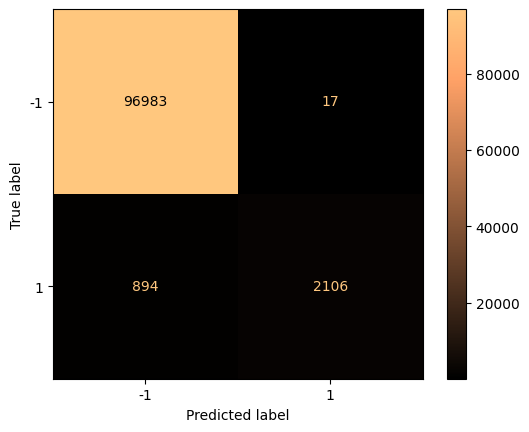

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
cm=confusion_matrix(dataset_test["Attack"], dataset_test["Anomaly Remote Port Entropy Based"])
disp_poly = ConfusionMatrixDisplay.from_predictions(dataset_test["Attack"], dataset_test["Anomaly Remote Port Entropy Based"],cmap='copper')